In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings('ignore')


(a)
Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29
. Download the data in
https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data
, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes.

In [12]:
dataset = pd.read_csv('../data/wdbc.data', header = None)
cols=['ID','Diagnosis','Attr_1','Attr_2','Attr_3',
      'Attr_4','Attr_5','Attr_6','Attr_7','Attr_8',
      'Attr_9','Attr_10','Attr_11','Attr_12','Attr_13',
      'Attr_14','Attr_15','Attr_16','Attr_17','Attr_18',
      'Attr_19','Attr_20','Attr_21','Attr_22','Attr_23',
      'Attr_24','Attr_25','Attr_26','Attr_27','Attr_28','Attr_29','Attr_30']
dataset.columns = cols
dataset = dataset.drop('ID',axis=1)

In [13]:
x = pd.DataFrame()
x = dataset.drop(['Diagnosis'],axis=1)

y = np.where(dataset['Diagnosis'] == 'M', 0, 1) # Benign =1 Malignant=0
y = pd.DataFrame(y)
y.columns = ['Diagnosis']

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)

normalized_data = pd.concat([x,y],axis=1)
x_pos = normalized_data[normalized_data['Diagnosis'] == 1] #Positive class = Benign
x_neg = normalized_data[normalized_data['Diagnosis'] == 0] #Negative class = Malignant

In [14]:
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


(b)
Monte-Carlo Simulation
: Repeat the following procedures for supervised, un-
supervised, and semi-supervised learning
M
= 30 times, and use randomly se-
lected train and test data (make sure you use 20% of both the positve and nega-
tive classes as the test set). Then compare the
average
scores (accuracy, precision,
recall,
F
1
-score, and AUC) that you obtain from each algorithm.

i.
Supervised Learning:
Train an
L
1
-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall,
F
1
-score, and AUC, for
both training and test sets over your
M
runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs.

In [24]:
final_sv_train_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_sv_test_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}

sv_train_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}
sv_test_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}


In [26]:
for i in range(1,31):
    best_penalty = []
    supervised_train_results = pd.DataFrame()
    supervised_test_results = pd.DataFrame()
    
    x_test = pd.concat([x_pos.sample(frac=0.2),x_neg.sample(frac=0.2)])
    x_train = normalized_data.drop(index=x_test.index.tolist())
    y_train = x_train['Diagnosis']
    y_test = x_test['Diagnosis']
    x_test = x_test.drop(['Diagnosis'],axis=1)
    x_train = x_train.drop(['Diagnosis'],axis=1)
    
    params = {'C':[0.1,1,10,100,1000]}
    l_svc = LinearSVC(penalty='l1', dual = False, max_iter=1000000)
    sv_classifier = GridSearchCV(l_svc, params, cv=5)
    sv_classifier.fit(x_train,y_train)
    best_penalty.append(sv_classifier.best_params_['C'])

    supervised_train_results['y_true'] = y_train
    supervised_train_results['y_pred'] = sv_classifier.predict(x_train)
    supervised_test_results['y_true'] = y_test
    supervised_test_results['y_pred'] = sv_classifier.predict(x_test)
    
    sv_train_scores['accuracy'].append(sv_classifier.score(x_train,y_train))
    sv_test_scores['accuracy'].append(sv_classifier.score(x_test,y_test))
    sv_train_scores['precision'].append(precision_score(supervised_train_results['y_true'],supervised_train_results['y_pred']))
    sv_test_scores['precision'].append(precision_score(supervised_test_results['y_true'],supervised_test_results['y_pred']))
    sv_train_scores['recall'].append(recall_score(supervised_train_results['y_true'],supervised_train_results['y_pred']))
    sv_test_scores['recall'].append(recall_score(supervised_test_results['y_true'],supervised_test_results['y_pred']))
    sv_train_scores['fscore'].append(f1_score(supervised_train_results['y_true'],supervised_train_results['y_pred']))
    sv_test_scores['fscore'].append(f1_score(supervised_test_results['y_true'],supervised_test_results['y_pred']))

    fpr,tpr,_ = roc_curve(supervised_train_results['y_true'],supervised_train_results['y_pred'])
    area_uc = auc(fpr,tpr)
    sv_train_scores['auc'].append(auc(fpr,tpr))

    fpr,tpr,_ = roc_curve(supervised_test_results['y_true'],supervised_test_results['y_pred'])
    area_uc = auc(fpr,tpr)
    sv_test_scores['auc'].append(auc(fpr,tpr))

    final_sv_train_scores['accuracy'] = np.mean(sv_train_scores['accuracy'])
    final_sv_train_scores['precision'] = np.mean(sv_train_scores['precision'])
    final_sv_train_scores['recall'] = np.mean(sv_train_scores['recall'])
    final_sv_train_scores['fscore'] = np.mean(sv_train_scores['fscore'])
    final_sv_train_scores['auc'] = np.mean(sv_train_scores['auc'])
    
    final_sv_test_scores['accuracy'] = np.mean(sv_test_scores['accuracy'])
    final_sv_test_scores['precision'] = np.mean(sv_test_scores['precision'])
    final_sv_test_scores['recall'] = np.mean(sv_test_scores['recall'])
    final_sv_test_scores['fscore'] = np.mean(sv_test_scores['fscore'])
    final_sv_test_scores['auc'] = np.mean(sv_test_scores['auc'])
    

In [178]:
print('Average Score over 30 Runs for Train set: ', final_sv_train_scores)
print('\n')
print('Average Score over 30 Runs for Test set: ', final_sv_test_scores)

Average Score over 30 Runs for Train set:  {'accuracy': 0.9855263157894735, 'precision': 0.9833177323728776, 'recall': 0.9938228438228439, 'fscore': 0.9885284258838123, 'auc': 0.982695735636912}


Average Score over 30 Runs for Test set:  {'accuracy': 0.9622418879056048, 'precision': 0.9617816698309916, 'recall': 0.979342723004695, 'fscore': 0.9702753790496706, 'auc': 0.9563380281690141}


Confusion Matrix for train data: 
 [[167   3]
 [  1 285]]
Area under curve for train data:  0.9894282188399836


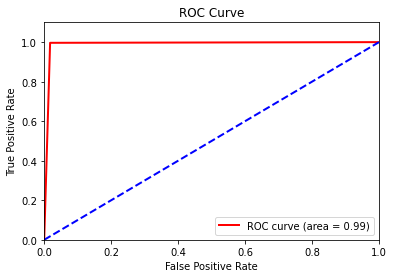

In [29]:
cm = metrics.confusion_matrix(supervised_train_results['y_true'],supervised_train_results['y_pred'])
print('Confusion Matrix for train data: \n',cm)

fpr,tpr,_ = roc_curve(supervised_train_results['y_true'],supervised_train_results['y_pred'])
area_uc = auc(fpr,tpr)
print('Area under curve for train data: ',area_uc)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1],[0, 1],color ='blue',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

Confusion Matrix for Test data: 
 [[34  8]
 [ 0 71]]
Area under curve for test data:  0.9047619047619048


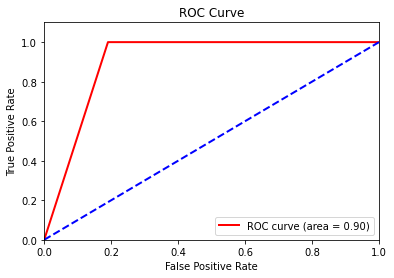

In [30]:
cm = metrics.confusion_matrix(supervised_test_results['y_true'],supervised_test_results['y_pred'])
print('Confusion Matrix for Test data: \n',cm)

fpr,tpr,_ = roc_curve(supervised_test_results['y_true'],supervised_test_results['y_pred'])
area_uc = auc(fpr,tpr)
print('Area under curve for test data: ',area_uc)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1],[0, 1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

ii.
Semi-Supervised Learning/ Self-training:
select 50% of the positive
class along with 50% of the negative class in the training set as
labeled data
and the rest as
unlabelled data
. You can select them randomly.

A.
Train an
L
1
-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.

B.
Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data andthe
average accuracy, precision, recall,
F
1
-score, and AUC, for both training
and test sets over your
M
runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.

In [55]:
best_penalty=[]
def fit_l1_svm(x_train,y_train):
    params = {'C':[0.1,1,10,100,1000]}
    l_svc = LinearSVC(penalty='l1', dual = False, max_iter=200000)
    sv_classifier = GridSearchCV(l_svc, params, cv=5)
    sv_classifier.fit(x_train,y_train)
    best_penalty.append(sv_classifier.best_params_['C'])
    return sv_classifier 

In [38]:
x_test = pd.concat([x_pos.sample(frac=0.2),x_neg.sample(frac=0.2)])
x_train = normalized_data.drop(index=x_test.index.tolist())
y_test = x_test['Diagnosis']
y_train = x_train['Diagnosis']
x_test = x_test.drop(['Diagnosis'],axis=1)
x_train = x_train.drop(['Diagnosis'],axis=1)
    
x_label, x_unlabel, y_label, y_unlabel = train_test_split(x_train, y_train, test_size=0.50, stratify=y_train)

x_label = x_label.reset_index(drop=True)
y_label = y_label.reset_index(drop=True)
x_unlabel = x_unlabel.reset_index(drop=True)
y_unlabel = pd.DataFrame(y_unlabel)
y_unlabel = y_unlabel.reset_index(drop=True)

trained_svm = fit_l1_svm(x_label,y_label)
print('Best Weight of SVM penalty = ', trained_svm.best_params_['C'])

Best Weight of SVM penalty =  1


In [39]:
final_semi_train_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_semi_test_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}

semi_train_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}
semi_test_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}

In [142]:
for i in range(1,31):
    x_test = pd.concat([x_pos.sample(frac=0.2),x_neg.sample(frac=0.2)])
    x_train = normalized_data.drop(index=x_test.index.tolist())
    y_test = x_test['Diagnosis']
    y_train = x_train['Diagnosis']
    x_test = x_test.drop(['Diagnosis'],axis=1)
    x_train = x_train.drop(['Diagnosis'],axis=1)

    x_label, x_unlabel, y_label, y_unlabel = train_test_split(x_train,y_train,test_size=0.50,stratify=y_train)

    x_label = x_label.reset_index(drop=True)
    y_label = y_label.reset_index(drop=True)
    x_unlabel = x_unlabel.reset_index(drop=True)
    y_unlabel = pd.DataFrame(y_unlabel)
    y_unlabel = y_unlabel.reset_index(drop=True)

    trained_svm = fit_l1_svm(x_label,y_label)
    
    new_x_label = pd.DataFrame()
    new_x_label = pd.concat([x_label,new_x_label],axis=0,ignore_index=True)
    new_y_label = pd.DataFrame()
    y_label = pd.DataFrame(y_label)
    new_y_label = pd.concat([y_label,new_y_label],axis=0,ignore_index=True)
    
    while(len(x_unlabel)>0):
    
        a = trained_svm.decision_function(x_unlabel)
        farthest_point_1 = np.array(x_unlabel.iloc[np.argmax(np.absolute(a))])
        farthest_point_1 = farthest_point_1.reshape(1,-1)
        label_pred = trained_svm.predict(farthest_point_1)
        farthest_point_1 = pd.DataFrame(farthest_point_1)

        new_x_label = pd.concat([new_x_label,farthest_point_1],axis=0,ignore_index=True)
        farthest_point_1_y = np.array(label_pred)
        farthest_point_1_y = farthest_point_1_y.reshape(1,-1)
        farthest_point_1_y = pd.DataFrame(farthest_point_1_y)
        farthest_point_1_y.columns = ['Diagnosis']
        new_y_label = pd.concat([new_y_label,farthest_point_1_y],axis=0,ignore_index=True)

        trained_svm = fit_l1_svm(new_x_label,np.ravel(new_y_label,order='C'))

        x_unlabel = x_unlabel.drop(index=np.argmax(np.absolute(a)))
        x_unlabel = x_unlabel.reset_index(drop=True)
        y_unlabel = y_unlabel.drop(index=np.argmax(np.absolute(a)))
        y_unlabel = y_unlabel.reset_index(drop=True)
    
    semi_test_results = pd.DataFrame()
    semi_test_results['y_true'] = y_test
    semi_test_results['y_pred'] = trained_svm.predict(x_test)
    
    semi_train_results = pd.DataFrame()
    semi_train_results['y_true'] = y_train
    semi_train_results['y_pred'] = trained_svm.predict(x_train)
   
    semi_train_scores['accuracy'].append(trained_svm.score(x_train,y_train))
    semi_test_scores['accuracy'].append(trained_svm.score(x_test,y_test))
    semi_train_scores['precision'].append(precision_score(semi_train_results['y_true'],semi_train_results['y_pred']))
    semi_test_scores['precision'].append(precision_score(semi_test_results['y_true'],semi_test_results['y_pred']))
    semi_train_scores['recall'].append(recall_score(semi_train_results['y_true'],semi_train_results['y_pred']))
    semi_test_scores['recall'].append(recall_score(semi_test_results['y_true'],semi_test_results['y_pred']))
    semi_train_scores['fscore'].append(f1_score(semi_train_results['y_true'],semi_train_results['y_pred']))
    semi_test_scores['fscore'].append(f1_score(semi_test_results['y_true'],semi_test_results['y_pred']))

    fpr,tpr,_ = roc_curve(semi_train_results['y_true'],semi_train_results['y_pred'])
    area_uc = auc(fpr,tpr)
    semi_train_scores['auc'].append(auc(fpr, tpr))

    fpr,tpr,_ = roc_curve(semi_test_results['y_true'],semi_test_results['y_pred'])
    area_uc = auc(fpr,tpr)
    semi_test_scores['auc'].append(auc(fpr, tpr))

    final_semi_train_scores['accuracy'] = np.mean(semi_train_scores['accuracy'])
    final_semi_train_scores['precision'] = np.mean(semi_train_scores['precision'])
    final_semi_train_scores['recall'] = np.mean(semi_train_scores['recall'])
    final_semi_train_scores['fscore'] = np.mean(semi_train_scores['fscore'])
    final_semi_train_scores['auc'] = np.mean(semi_train_scores['auc'])

    final_semi_test_scores['accuracy'] = np.mean(semi_test_scores['accuracy'])
    final_semi_test_scores['precision'] = np.mean(semi_test_scores['precision'])
    final_semi_test_scores['recall'] = np.mean(semi_test_scores['recall'])
    final_semi_test_scores['fscore'] = np.mean(semi_test_scores['fscore'])
    final_semi_test_scores['auc'] = np.mean(semi_test_scores['auc'])
    

In [179]:
print('Average Score over 30 Runs for Train set: ')
print(final_semi_train_scores)
print('\n')
print('Average Score over 30 Runs for Test set: ')
print(final_semi_test_scores)


Average Score over 30 Runs for Train set: 
{'accuracy': 0.9759868421052632, 'precision': 0.9698553372271121, 'recall': 0.9927156177156176, 'fscore': 0.981099530309217, 'auc': 0.9702793774852598}


Average Score over 30 Runs for Test set: 
{'accuracy': 0.9663716814159292, 'precision': 0.9665833771229759, 'recall': 0.9807511737089202, 'fscore': 0.9734418168424137, 'auc': 0.9614073328862062}


Confusion Matrix for train data: 
 [[165   5]
 [  2 284]]
Area under curve for train data:  0.9817976141505552


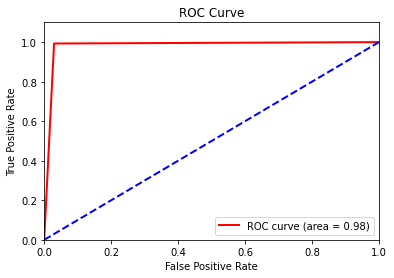

In [143]:
cm = metrics.confusion_matrix(semi_train_results['y_true'],semi_train_results['y_pred'])
print('Confusion Matrix for train data: \n',cm)

fpr,tpr,_ = roc_curve(semi_train_results['y_true'],semi_train_results['y_pred'])
area_uc = auc(fpr, tpr)
print('Area under curve for train data: ',area_uc)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1],[0, 1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

Confusion Matrix for Test data: 
 [[40  2]
 [ 1 70]]
Area under curve for test data:  0.9691482226693494


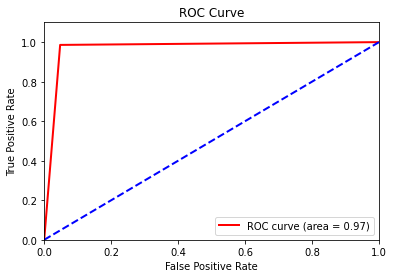

In [144]:
cm = metrics.confusion_matrix(semi_test_results['y_true'],semi_test_results['y_pred'])
print('Confusion Matrix for Test data: \n',cm)

fpr,tpr,_ = roc_curve(semi_test_results['y_true'],semi_test_results['y_pred'])
area_uc = auc(fpr, tpr)
print('Area under curve for test data: ',area_uc)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1],[0, 1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

iii.
Unsupervised Learning:
Run k-means algorithm on the whole training
set. Ignore the labels of the data, and assume
k
= 2.

A.
Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

In [129]:
final_unsup_train_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_unsup_test_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}

unsup_train_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}
unsup_test_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}

In [150]:
for i in range(1,31):
    x_test = pd.concat([x_pos.sample(frac=0.2),x_neg.sample(frac=0.2)])
    x_train = normalized_data.drop(index=x_test.index.tolist())
    y_test = x_test['Diagnosis']
    y_train = x_train['Diagnosis']
    x_test = x_test.drop(['Diagnosis'],axis=1)
    x_train = x_train.drop(['Diagnosis'],axis=1)

    x_label, x_unlabel, y_label, y_unlabel = train_test_split(x_train, y_train, test_size=0.50, stratify=y_train)

    x_train = x_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    k_means = KMeans(n_clusters=2,init='k-means++',random_state=random.randint(0,200)).fit(x_train)
    clus_dist= k_means.transform(x_train)
    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(x_train)
    distances,indices = nn.kneighbors(k_means.cluster_centers_)

    clus_0 = y_train.loc[indices[0]]
    clus_1 = y_train.loc[indices[1]]
    maj_poll_clus_0 = clus_0.value_counts()
    maj_poll_clus_1 = clus_1.value_counts()

    pred_labels = k_means.labels_
    pred_labels = pd.DataFrame(pred_labels)
    pred_labels_0 = pred_labels[pred_labels[0]==0]
    pred_labels_1 = pred_labels[pred_labels[0]==1]

    max_index_0 = np.argmax(maj_poll_clus_0)
    max_index_1 = np.argmax(maj_poll_clus_1)
    pred_labels_0['class'] = max_index_0
    pred_labels_1['class'] = max_index_1
    final_pred_y = pd.concat([pred_labels_0['class'],pred_labels_1['class']],axis=0)
    final_pred_y = final_pred_y.sort_index()
   
    unsup_test_results = pd.DataFrame()
    unsup_test_results['y_true'] = y_test
    unsup_test_results['y_pred'] = k_means.predict(x_test)

    unsup_train_scores['accuracy'].append(accuracy_score(y_train,final_pred_y))
    unsup_test_scores['accuracy'].append(accuracy_score(unsup_test_results['y_true'],unsup_test_results['y_pred']))
    unsup_train_scores['precision'].append(precision_score(y_train,final_pred_y))
    unsup_test_scores['precision'].append(precision_score(unsup_test_results['y_true'],unsup_test_results['y_pred']))
    unsup_train_scores['recall'].append(recall_score(y_train,final_pred_y))
    unsup_test_scores['recall'].append(recall_score(unsup_test_results['y_true'],unsup_test_results['y_pred']))
    unsup_train_scores['fscore'].append(f1_score(y_train,final_pred_y))
    unsup_test_scores['fscore'].append(f1_score(unsup_test_results['y_true'],unsup_test_results['y_pred']))

    fpr,tpr,_ = roc_curve(y_train,final_pred_y)
    area_uc = auc(fpr,tpr)
    unsup_train_scores['auc'].append(auc(fpr, tpr))

    fpr,tpr,_ = roc_curve(unsup_test_results['y_true'],unsup_test_results['y_pred'])
    area_uc = auc(fpr,tpr)
    unsup_test_scores['auc'].append(auc(fpr, tpr))

    final_unsup_train_scores['accuracy'] = np.mean(unsup_train_scores['accuracy'])
    final_unsup_train_scores['precision'] = np.mean(unsup_train_scores['precision'])
    final_unsup_train_scores['recall'] = np.mean(unsup_train_scores['recall'])
    final_unsup_train_scores['fscore'] = np.mean(unsup_train_scores['fscore'])
    final_unsup_train_scores['auc'] = np.mean(unsup_train_scores['auc'])
 
    final_unsup_test_scores['accuracy'] = np.mean(unsup_test_scores['accuracy'])
    final_unsup_test_scores['precision'] = np.mean(unsup_test_scores['precision'])
    final_unsup_test_scores['recall'] = np.mean(unsup_test_scores['recall'])
    final_unsup_test_scores['fscore'] = np.mean(unsup_test_scores['fscore'])
    final_unsup_test_scores['auc'] = np.mean(unsup_test_scores['auc'])
    

In [180]:
print('Average Score over 30 Runs for Train set: ')
print(final_unsup_train_scores)
print('\n')
print('Average Score over 30 Runs for Test set: ')
print(final_unsup_test_scores)

Average Score over 30 Runs for Train set: 
{'accuracy': 0.37280701754385975, 'precision': 0.0, 'recall': 0.0, 'fscore': 0.0, 'auc': 0.5}


Average Score over 30 Runs for Test set: 
{'accuracy': 0.41868239921337264, 'precision': 0.39770034003820953, 'recall': 0.40978090766823166, 'fscore': 0.4013964264803483, 'auc': 0.4217555331991951}


Confusion Matrix for train data: 
 [[170   0]
 [286   0]]
Area under curve for train data:  0.5


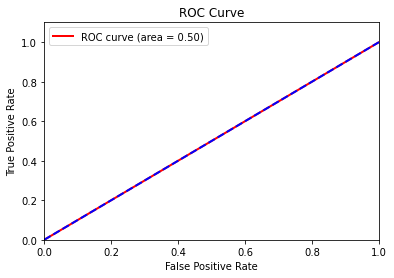

In [167]:
cm = metrics.confusion_matrix(y_train,final_pred_y)
print('Confusion Matrix for train data: \n',cm)

fpr, tpr, _ = roc_curve(y_train,final_pred_y)
area_uc = auc(fpr, tpr)
print('Area under curve for train data: ',area_uc)

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1],[0, 1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()


Confusion Matrix for test data:
 [[36  6]
 [ 1 70]]
Area under curve for test data: 0.9215291750503019


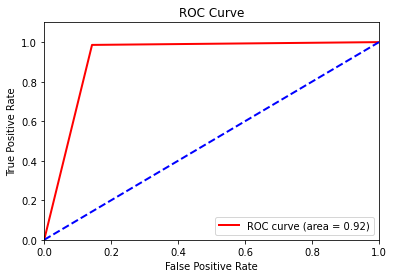

In [169]:
cm = metrics.confusion_matrix(unsup_test_results['y_true'],unsup_test_results['y_pred'])
print('Confusion Matrix for test data: \n',cm)

fpr, tpr, _ = roc_curve(unsup_test_results['y_true'],unsup_test_results['y_pred'])
area_uc = auc(fpr, tpr)
print('Area under curve for test data: ',area_uc)

plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

iv.
Spectral Clustering
: Repeat 1(b)iii using
spectral clustering
, which is clus-
tering based on kernels.
3
Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has
p
and the
negative class has
n
samples, the two clusters must have
p
and
n
members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use
fit
−
predict
method.

In [181]:
final_spec_train_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}
final_spec_test_scores = {p:None for p in ['accuracy','precision','recall','fscore','auc']}

spec_train_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}
spec_test_scores = {p:[] for p in ['accuracy','precision','recall','fscore','auc']}


In [182]:
for i in range(1,31):
    x_test = pd.concat([x_pos.sample(frac=0.2),x_neg.sample(frac=0.2)])
    x_train = normalized_data.drop(index=x_test.index.tolist())
    y_test = x_test['Diagnosis']
    y_train = x_train['Diagnosis']
    x_test = x_test.drop(['Diagnosis'],axis=1)
    x_train = x_train.drop(['Diagnosis'],axis=1)

    x_label, x_unlabel, y_label, y_unlabel = train_test_split(x_train, y_train, test_size=0.50, stratify=y_train)

    x_train = x_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    spec_clus = SpectralClustering(n_clusters=2,affinity='rbf',random_state=random.randint(0,200)).fit(x_train)
    spec_clus_labels = pd.DataFrame(spec_clus.labels_)
    spec_clus_label_0 = spec_clus_labels[spec_clus_labels[0]==0].index
    spec_clus_label_1 = spec_clus_labels[spec_clus_labels[0]==1].index
    spec_clus_0 = x_train.iloc[spec_clus_label_0,:]
    spec_clus_1 = x_train.iloc[spec_clus_label_1,:]
    
    centers = pd.DataFrame()
    center_0 = spec_clus_0.mean(axis=0)
    center_1 = spec_clus_1.mean(axis=0)
    centers[0] = center_0
    centers[1] = center_1

    nn = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(x_train)
    distances, indices = nn.kneighbors(centers.T)

    spec_clus_0 = y_train.loc[indices[0]]
    spec_clus_1 = y_train.loc[indices[1]]
    maj_poll_clus_0 = spec_clus_0.value_counts()
    maj_poll_clus_1 = spec_clus_1.value_counts()

    pred_labels_spec = k_means.labels_
    pred_labels_spec = pd.DataFrame(pred_labels_spec)
    pred_labels_spec_0 = pred_labels_spec[pred_labels_spec[0]==0]
    pred_labels_spec_1 = pred_labels_spec[pred_labels_spec[0]==1]

    max_index_spec_0 = np.argmax(maj_poll_clus_0)
    max_index_spec_1 = np.argmax(maj_poll_clus_1)
    pred_labels_spec_0['class'] = max_index_spec_0
    pred_labels_spec_1['class'] = max_index_spec_1
    final_pred_spec_y = pd.concat([pred_labels_spec_0['class'],pred_labels_spec_1['class']],axis=0)
    final_pred_spec_y = final_pred_spec_y.sort_index()
    
    spec_test_results = pd.DataFrame()
    spec_test_results['y_true'] = y_test
    spec_test_results['y_pred'] = spec_clus.fit_predict(x_test)

    spec_train_scores['accuracy'].append(accuracy_score(y_train,final_pred_spec_y))
    spec_test_scores['accuracy'].append(accuracy_score(spec_test_results['y_true'],spec_test_results['y_pred']))
    spec_train_scores['precision'].append(precision_score(y_train,final_pred_spec_y))
    spec_test_scores['precision'].append(precision_score(spec_test_results['y_true'],spec_test_results['y_pred']))
    spec_train_scores['recall'].append(recall_score(y_train,final_pred_spec_y))
    spec_test_scores['recall'].append(recall_score(spec_test_results['y_true'],spec_test_results['y_pred']))
    spec_train_scores['fscore'].append(f1_score(y_train,final_pred_spec_y))
    spec_test_scores['fscore'].append(f1_score(spec_test_results['y_true'],spec_test_results['y_pred']))

    fpr,tpr,_ = roc_curve(y_train,final_pred_spec_y)
    area_uc = auc(fpr,tpr)
    spec_train_scores['auc'].append(auc(fpr,tpr))

    fpr,tpr,_ = roc_curve(spec_test_results['y_true'],spec_test_results['y_pred'])
    area_uc = auc(fpr,tpr)
    spec_test_scores['auc'].append(auc(fpr, tpr))

    final_spec_train_scores['accuracy'] = np.mean(spec_train_scores['accuracy'])
    final_spec_train_scores['precision'] = np.mean(spec_train_scores['precision'])
    final_spec_train_scores['recall'] = np.mean(spec_train_scores['recall'])
    final_spec_train_scores['fscore'] = np.mean(spec_train_scores['fscore'])
    final_spec_train_scores['auc'] = np.mean(spec_train_scores['auc'])

    final_spec_test_scores['accuracy'] = np.mean(spec_test_scores['accuracy'])
    final_spec_test_scores['precision'] = np.mean(spec_test_scores['precision'])
    final_spec_test_scores['recall'] = np.mean(spec_test_scores['recall'])
    final_spec_test_scores['fscore'] = np.mean(spec_test_scores['fscore'])
    final_spec_test_scores['auc'] = np.mean(spec_test_scores['auc'])


In [183]:
print('Average Score over 30 Runs for Train set: ')
print(final_spec_train_scores)
print('\n')
print('Average Score over 30 Runs for Test set: ')
print(final_spec_test_scores)


Average Score over 30 Runs for Train set: 
{'accuracy': 0.37280701754385964, 'precision': 0.0, 'recall': 0.0, 'fscore': 0.0, 'auc': 0.5}


Average Score over 30 Runs for Test set: 
{'accuracy': 0.4454277286135693, 'precision': 0.3496692332796731, 'recall': 0.4014084507042253, 'fscore': 0.3714814898537712, 'auc': 0.4606248602727475}


Confusion Matrix for train data: 
 [[170   0]
 [286   0]]
Area under curve for train data: 0.5


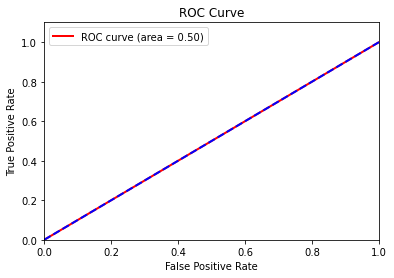

In [184]:
cm = metrics.confusion_matrix(y_train,final_pred_spec_y)
print('Confusion Matrix for train data: \n',cm)

fpr, tpr, _ = roc_curve(y_train,final_pred_spec_y)
area_uc = auc(fpr, tpr)
print('Area under curve for train data: ',area_uc)

plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

Confusion Matrix for test data:
 [[30 12]
 [71  0]]
Area under curve for test data: 0.35714285714285715


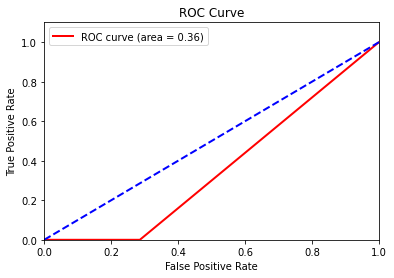

In [185]:
cm = metrics.confusion_matrix(spec_test_results['y_true'],spec_test_results['y_pred'])
print('Confusion Matrix for test data:\n',cm)

fpr, tpr, _ = roc_curve(spec_test_results['y_true'],spec_test_results['y_pred'])
area_uc = auc(fpr, tpr)
print('Area under curve for test data: ',area_uc)

plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % area_uc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend()
plt.show()

In [187]:
print('Results for Test Data : \n')
pd.DataFrame({'Supervised':final_sv_test_scores,
              'Semi-Supervised':final_semi_test_scores,
              'Unsupervised - K-means':final_unsup_test_scores,
              'Unsupervised - Spectral':final_spec_test_scores})

Results for Test Data : 



,Supervised,Semi-Supervised,Unsupervised - K-means,Unsupervised - Spectral
accuracy,0.962242,0.966372,0.418682,0.445428
precision,0.961782,0.966583,0.397700,0.349669
recall,0.979343,0.980751,0.409781,0.401408
fscore,0.970275,0.973442,0.401396,0.371481
auc,0.956338,0.961407,0.421756,0.460625


v.
One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.


Semi-Supervised learning performs better than Supervised learning but not significantly.

Unsupervised learning underperforms. Its accuracy score is significantly lower than Supervised and Semi-Supervised.

Spectral Clustering performs better than K-means Algorithm, with slightly higher accuracy score.